In [2]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

     |████████████████████████████████| 320.4 MB 21 kB/s s eta 0:00:01   |█▍                              | 13.8 MB 3.2 MB/s eta 0:01:36     |█████▊                          | 57.1 MB 62.1 MB/s eta 0:00:055               | 95.6 MB 60.2 MB/s eta 0:00:04| 104.9 MB 35.5 MB/s eta 0:00:07�█████████▍                 | 144.0 MB 18.1 MB/s eta 0:00:10 0:00:101.0 MB 18.1 MB/s eta 0:00:09��█               | 170.7 MB 42.3 MB/s eta 0:00:04███████████████████▌            | 194.9 MB 42.3 MB/s eta 0:00:03███████████████           | 209.5 MB 33.5 MB/s eta 0:00:04██████████████████████▎       | 243.3 MB 54.3 MB/s eta 0:00:02██████████████████████▋       | 246.7 MB 54.3 MB/s eta 0:00:02��█       | 250.1 MB 54.3 MB/s eta 0:00:02     |█████████████████████████▉      | 258.6 MB 54.3 MB/s eta 0:00:02��█████████████▌    | 275.0 MB 51.9 MB/s eta 0:00:01██████████████████▎   | 283.5 MB 51.9 MB/s eta 0:00:01��█████████████████████████   | 290.5 MB 51.9 MB/s eta 0:00:01�█▏ | 302.2 MB 51.8 MB/s eta 0:00:01�███████

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_c8f8d81ea97a4c8ea9230db687755a28.csv"
df=pd.read_csv(url,header=None,na_values=["?"])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [2]:
df.shape

(452, 280)

In [3]:
df=df.fillna(df.median())

In [4]:
m=pd.DataFrame(df.isna().any()).rename(columns={0:"missing"})
m[m["missing"]==True]

,missing


All the missing values have been filled.

In [5]:
df.groupby(df.iloc[:,279]).count().T.head()

279,1,2,3,4,5,6,7,8,9,10,14,15,16
0,245,44,15,15,13,25,3,2,9,50,4,5,22
1,245,44,15,15,13,25,3,2,9,50,4,5,22
2,245,44,15,15,13,25,3,2,9,50,4,5,22
3,245,44,15,15,13,25,3,2,9,50,4,5,22
4,245,44,15,15,13,25,3,2,9,50,4,5,22


Imbalanced class distributions.

In [6]:
df1=df[df.iloc[:,279]==1]
df2=df[df.iloc[:,279]==2]
df=pd.concat([df1,df2],axis=0)
df.shape

(289, 280)

In [7]:
df.groupby(df.iloc[:,279]).count().T.head()

279,1,2
0,245,44
1,245,44
2,245,44
3,245,44
4,245,44


In [8]:
X=df.iloc[:,0:279]
X.head()

,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,274,275,276,277,278
3,55,0,175,94,100,202,380,179,143,28,...,0.1,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6
6,40,1,160,52,77,129,377,133,77,77,...,-0.4,0.0,6.5,0.0,0.0,0,0.4,1.0,14.3,20.5
7,49,1,162,54,78,0,376,157,70,67,...,-0.3,0.0,8.2,-1.9,0.0,0,0.1,0.5,15.8,19.8
8,44,0,168,56,84,118,354,160,63,61,...,0.1,0.0,7.0,-1.3,0.0,0,0.6,2.1,12.5,30.9
11,45,1,165,86,77,143,373,150,65,12,...,0.1,0.0,4.4,-2.2,0.0,0,0.5,1.5,4.9,17.2


In [9]:
y=pd.DataFrame(df.iloc[:,279]).rename(columns={279:"Class"})
y.head()

,Class
3,1
6,1
7,1
8,1
11,1


In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X))
X.head()

,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,274,275,276,277,278
0,0.541317,-1.343810,1.391771,1.580763,1.624466,1.033865,0.429942,0.359850,2.169932,-0.210842,...,0.896684,0.537645,0.922294,-0.409288,-0.081326,0.0,-0.388343,1.032918,1.194286,1.757369
1,-0.487447,0.744153,-0.496594,-1.116356,-0.886656,-0.627707,0.326253,-1.036893,-0.611232,1.122669,...,-0.225141,0.537645,-0.896132,0.644682,-0.081326,0.0,-0.388343,-0.203482,-0.502495,-0.586586
2,0.129812,0.744153,-0.244812,-0.987921,-0.777477,-3.563909,0.291691,-0.308158,-0.906204,0.850524,...,-0.000776,0.537645,-0.353794,-0.265565,-0.081326,0.0,-1.323602,-0.589857,-0.377117,-0.626507
3,-0.213110,-1.343810,0.510534,-0.859487,-0.122402,-0.878080,-0.468690,-0.217066,-1.201176,0.687237,...,0.896684,0.537645,-0.736621,0.021882,-0.081326,0.0,0.235163,0.646543,-0.652948,0.006532
4,-0.144525,0.744153,0.132861,1.067026,-0.886656,-0.309049,0.188002,-0.520706,-1.116898,-0.646274,...,0.896684,0.537645,-1.566078,-0.409288,-0.081326,0.0,-0.076590,0.182893,-1.288196,-0.774786


In [11]:
import numpy as np
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# feature extraction. We are going to output the selection scores for all features and select the features with the highest scores.
test = SelectKBest(score_func=f_classif, k="all")
fit = test.fit(X, np.asarray(y).reshape(y.shape[0],))
features = fit.transform(X)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 19  25  26  31  67  69  72  74  83  86  93  94 103 106 115 118 119 129
 131 132 139 141 142 143 145 151 154 156 157 164 174 204 234 244 264 274] are constant.
  UserWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,scores
276,170.254515
266,157.922801
196,157.693038
176,131.220684
166,129.593581
...,...
204,NaN
234,NaN
244,NaN
264,NaN


In [12]:
scores=scores.fillna(0)
scores

,scores
276,170.254515
266,157.922801
196,157.693038
176,131.220684
166,129.593581
...,...
204,0.000000
234,0.000000
244,0.000000
264,0.000000


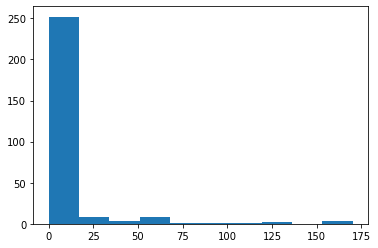

In [13]:
import matplotlib.pyplot as plt
plt.hist(scores)
plt.show()

In [14]:
X_scores=scores[scores["scores"]>30]
X_scores.shape

(22, 1)

In [15]:
X=X.iloc[:,X_scores.index]
X.head()

,276,266,196,176,166,259,256,269,189,216,...,249,159,246,258,248,169,198,206,178,168
0,1.032918,0.800934,-0.503615,0.116355,0.757704,0.831940,0.424136,0.896684,-1.384879,-0.240129,...,0.850603,2.580436,0.141767,0.865700,0.457775,0.523275,-0.782455,1.038637,0.460730,1.714933
1,-0.203482,-0.192248,0.286852,0.033531,-0.065172,0.639442,-0.172130,-0.225141,-0.118328,-0.123299,...,0.381771,-0.719325,0.141767,-0.546098,-0.404944,0.093654,0.836796,-0.013193,-0.339572,-0.939972
2,-0.589857,-0.484361,0.385660,-0.546236,-0.065172,0.254444,-0.385082,-0.000776,-0.118328,-0.590621,...,0.381771,-0.247931,0.027643,-0.581615,-0.407839,-0.335967,0.588872,0.381243,-0.328220,-0.694432
3,0.646543,1.268314,-0.701232,1.193064,-0.065172,0.831940,1.787028,0.896684,-2.144810,1.745991,...,1.475712,0.694858,1.168884,0.859780,0.231963,2.886190,0.395182,-1.196502,0.131528,-0.855568
4,0.182893,-0.425938,-0.602423,0.364826,0.483412,0.639442,-0.853576,0.896684,-0.624949,0.460854,...,0.225494,1.401950,-1.265764,-1.191323,-1.177916,0.523275,0.185996,0.381243,-0.396331,-0.003850


In [16]:
from imblearn.ensemble import BalancedRandomForestClassifier
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [33]:
BForest=BalancedRandomForestClassifier(n_estimators=200,criterion="entropy",max_depth=8,min_samples_split=4,min_samples_leaf=3,max_features="log2",bootstrap=False,sampling_strategy="not majority",replacement=False,n_jobs=-1,warm_start=False,class_weight="balanced",random_state=0).fit(X,y)
scores=cross_val_score(BForest,X,np.asarray(y).reshape(y.shape[0],),cv=10)
print("Accuracy: ",scores.mean())

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Accuracy:  0.9307881773399014


In [18]:
from sklearn.metrics import roc_auc_score as auc
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(BForest, X, y, cv=10)
AUC = roc_auc_score(y, y_pred)

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:862: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:862: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:862: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:862: Dat

NameError: name 'roc_auc_score' is not defined

In [19]:
print("AUC: ",auc(y,y_pred))

AUC:  0.8566326530612245


In [48]:
forest=RandomForestClassifier(n_estimators=350,criterion="gini",max_depth=7,min_samples_split=4,min_samples_leaf=2,max_features="auto",bootstrap=True,n_jobs=-1,warm_start=True,class_weight="balanced",random_state=0).fit(X,y)
scores=cross_val_score(forest,X,np.asarray(y).reshape(y.shape[0],),cv=8)

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: class_weight presets "balanced" or "balanced_subsamp

In [23]:
print("Accuracy: ",scores.mean())

Accuracy:  0.9305555555555556


In [49]:
y_pred = cross_val_predict(forest, X, y, cv=10)
AUC = roc_auc_score(y, y_pred)

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:862: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:862: DataConversionWarning: A column-vecto

AUC:  0.8339053803339518


In [50]:
print("AUC: ",auc(y,y_pred))

AUC:  0.8339053803339518


In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gradient=GradientBoostingClassifier(loss="deviance",learning_rate=0.06,n_estimators=300,subsample=0.95,criterion="mse",min_samples_split=4,min_samples_leaf=2,max_depth=2,max_features="sqrt",random_state=0).fit(X,y)
scores=cross_val_score(gradient,X,np.asarray(y).reshape(y.shape[0],),cv=8)
print("Accuracy: ",scores.mean())

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy:  0.9306493993993994


In [56]:
y_pred = cross_val_predict(gradient, X, y, cv=10)
AUC = roc_auc_score(y, y_pred)

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [57]:
print("AUC: ",auc(y,y_pred))

AUC:  0.8111781076066791


In [58]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
import numpy as np

svm=svm.SVC(C=0.5,kernel="linear",degree=2,gamma="auto",cache_size=50,
            decision_function_shape="ovo",probability=True,random_state=0).fit(X,y)
scores=cross_val_score(svm,X,np.asarray(y).reshape(y.shape[0],),cv=12)
print("Accuracy: ",scores.mean())

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy:  0.9168055555555554


In [59]:
y_pred = cross_val_predict(svm, X, y, cv=10)
AUC = roc_auc_score(y, y_pred)

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [60]:
print("AUC: ",AUC)

AUC:  0.7770871985157699
